<a href="https://colab.research.google.com/github/toraaglobal/TextMining/blob/master/twitter_mining_for_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
###Packages-----------------------

import tweepy
#conda install -c conda-forge tweepy
from tweepy import OAuthHandler
import json
from tweepy import Stream
from tweepy.streaming import StreamListener
import sys

import json
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re

from os import path
#from scipy.misc import imread
import matplotlib.pyplot as plt
##install wordcloud
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [3]:
#Mount the gdrive
import os
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/code')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

def get_twitter_auth():
	auth = []
	f = open("./auth.txt", "r")
	for line in f:
		auth.append(line.strip())
	f.close()
	return auth

authlist = get_twitter_auth()


consumer_key = authlist[0]
consumer_secret = authlist[1]
access_token = authlist[2]
access_secret = authlist[3]
 

 

In [0]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [0]:
api = tweepy.API(auth)

In [12]:
 
class Listener(StreamListener):
    print("In Listener...") 
    tweet_number=0
    #__init__ runs as soon as an instance of the class is created
    def __init__(self, max_tweets, hfilename, rawfile):
        self.max_tweets=max_tweets
        print(self.max_tweets)     
    #on_data() is a function of StreamListener as is on_error and on_status    
    def on_data(self, data):
        self.tweet_number+=1 
        print("In on_data", self.tweet_number)
        try:
            print("In on_data in try")
            with open(hfilename, 'a') as f:
                with open(rawfile, 'a') as g:
                    tweet=json.loads(data)
                    tweet_text=tweet["text"]
                    print(tweet_text,"\n")
                    f.write(tweet_text) # the text from the tweet
                    json.dump(tweet, g)  #write the raw tweet
        except BaseException:
            print("NOPE")
            pass
        if self.tweet_number>=self.max_tweets:
            #sys.exit('Limit of '+str(self.max_tweets)+' tweets reached.')
            print("Got ", str(self.max_tweets), "tweets.")
            return False
    #method for on_error()
    def on_error(self, status):
        print("ERROR")
        if(status==420):
            print("Error ", status, "rate limited")
            return False
#----------------end of class Listener

In Listener...


In [13]:
        
hashname=input("Enter the hash name, such as #womensrights: ") 
numtweets=eval(input("How many tweets do you want to get?: "))
if(hashname[0]=="#"):
    nohashname=hashname[1:] #remove the hash
else:
    nohashname=hashname
    hashname="#"+hashname

#Create a file for any hash name    
hfilename="file_"+nohashname+".txt"
rawfile="file_rawtweets_"+nohashname+".txt"
twitter_stream = Stream(auth, Listener(numtweets, hfilename, rawfile))
#twitter_stream.filter(track=['#womensrights'])
twitter_stream.filter(track=[hashname])
print("Twitter files created....")


Enter the hash name, such as #womensrights: Nigeria
How many tweets do you want to get?: 1000
1000
In on_data 1
In on_data in try
Umahi rattled as Ebonyi Perm Sec hopefuls fail to recite national anthem https://t.co/BDQ1cD6LjM #NigeriaNews #Nigeria 

In on_data 2
In on_data in try
BREAKING: Peter Obi arrives tribunal for inaugural sitting https://t.co/9G172iskLC #NigeriaNews #Nigeria 

In on_data 3
In on_data in try
Mexico confirms 13 dead in luxury jet crash https://t.co/PvXO0xhHaU #NigeriaNews #Nigeria 

In on_data 4
In on_data in try
RT @irene__rizzo: My Italian friends are still surprised to hear that I went to #Nigeria for #tourism! But I'm happy that so many are curio… 

In on_data 5
In on_data in try
Happy birthday to the 'Man in grey-green' Nigeria Actor, Producer, career coach &amp; Business man. @FemiJACOBS Sending… https://t.co/cLzMqadDy9 

In on_data 6
In on_data in try
RT @irene__rizzo: My Italian friends are still surprised to hear that I went to #Nigeria for #tourism! Bu

In [0]:
#-----------------------------------
#-----------------------------------
#https://docs.python.org/3/library/re.html

linecount=0
hashcount=0
wordcount=0
BagOfWords=[]
BagOfHashes=[]
BagOfLinks=[]

### SET THE FILE NAME ###

#tweetsfile=hfilename
tweetsfile = 'file_Nigeria.txt'

In [0]:
#########  Organize Clean Tweets into CSV for classific/cluster if you wish ####
filename="CleanText.csv"
NEWFILE=open(filename,"w")
## In the first row, create a column called Label and a column Text...
ToWrite="Label,Text\n"
## Write this to new empty cs v file
NEWFILE.write(ToWrite)
## Close it up
NEWFILE.close()
NEWFILE=open(filename, "a")
##############################################################################

In [0]:

with open(tweetsfile, 'r') as file:
    for line in file:
        #print(line,"\n")
        tweetSplitter = TweetTokenizer(strip_handles=True, reduce_len=True)
        WordList=tweetSplitter.tokenize(line)
        #WordList2=word_tokenize(line)
        #linecount=linecount+1
        #print(WordList)
        #print(len(WordList))
        #print(WordList[0])
        #print(WordList2)
        #print(len(WordList2))
        #print(WordList2[3:6])
        #print("NEXT..........\n")
        regex1=re.compile('^#.+')
        regex2=re.compile('[^\W\d]') #no numbers
        regex3=re.compile('^http*')
        regex4=re.compile('.+\..+')
        NewList =[]
        for item in WordList:
            if(len(item)>2):
                if((re.match(regex1,item))):
                    #print(item)
                    newitem=item[1:] #remove the hash
                    BagOfHashes.append(newitem)
                    hashcount=hashcount+1
                     # write each cleaned tweet on a line.    
                    NewList.append(newitem)
                elif(re.match(regex2,item)):
                    if(re.match(regex3,item) or re.match(regex4,item)):
                        BagOfLinks.append(item)
                    else:
                        BagOfWords.append(item)
                        wordcount=wordcount+1
                        # write each cleaned tweet on a line.
                        NewList.append(item)
                else:
                    pass
            else:
                pass
           
        
         # write each cleaned tweet on a line. 
        Text=" ".join(NewList)
        Text="\t"+","+Text + "\n"
        NEWFILE.write(Text)
        
    
NEWFILE.close() 

In [0]:
#print(linecount)            
#print(BagOfWords)
#print(BagOfHashes)
#print(BagOfLinks)
BigBag=BagOfWords+BagOfHashes


In [0]:

#list of words I have seen
seenit=[]
#dict of word counts
WordDict={}
Rawfilename="TwitterResultsRaw.txt"
Freqfilename="TwitterWordFrq.txt"


In [0]:

#FILE=open(Freqfilename,"w")
#FILE2=open(Rawfilename, "w")
R_FILE=open(Rawfilename,"w")
F_FILE=open(Freqfilename, "w")

IgnoreThese=["and", "And", "AND","THIS", "This", "this", "for", "FOR", "For", 
             "THE", "The", "the", "is", "IS", "Is", "or", "OR", "Or", "will", 
             "Will", "WILL", "God", "god", "GOD", "Bible", "bible", "BIBLE",
             "CanChew", "Download", "free", "FREE", "Free", "will", "WILL", 
             "Will", "hits", "hit", "within", "steam", "Via", "via", "know", "Study",
             "study", "unit", "Unit", "always", "take", "Take", "left", "Left",
             "lot","robot", "Robot", "Lot", "last", "Last", "Wonder", "still", "Still",
             "ferocious", "Need", "need", "food", "Food", "Flint", "MachineCredit",
             "Webchat", "luxury", "full", "fifdh17", "New", "new", "Caroline",
             "Tirana", "Shuayb", "repro", "attempted", "key", "Harrient", 
             "Chavez", "Women", "women", "Mumsnet", "Ali", "Tubman", "girl","Girl",
             "CSW61", "IWD2017", "Harriet", "Great", "great", "single", "Single", 
             "tailoring", "ask", "Ask"]
###Look at the words
for w in BigBag:
    if(w not in IgnoreThese):
        rawWord=w+" "
        R_FILE.write(rawWord)
        if(w in seenit):
            #print(w, seenit)
            WordDict[w]=WordDict[w]+1 #increment the times word is seen
        else:
            ##add word to dict and seenit
            seenit.append(w)
            WordDict[w]=1
    
#print(WordDict)  
#print(seenit)
#print(BagOfWords)



for key in WordDict:
    #print(WordDict[key])
    if(WordDict[key]>1):
        if(key not in IgnoreThese):
            #print(key)
            Key_Value=key + "," + str(WordDict[key]) + "\n"
            F_FILE.write(Key_Value)


#FILE.close()
#FILE2.close()
R_FILE.close()
F_FILE.close()

#------------

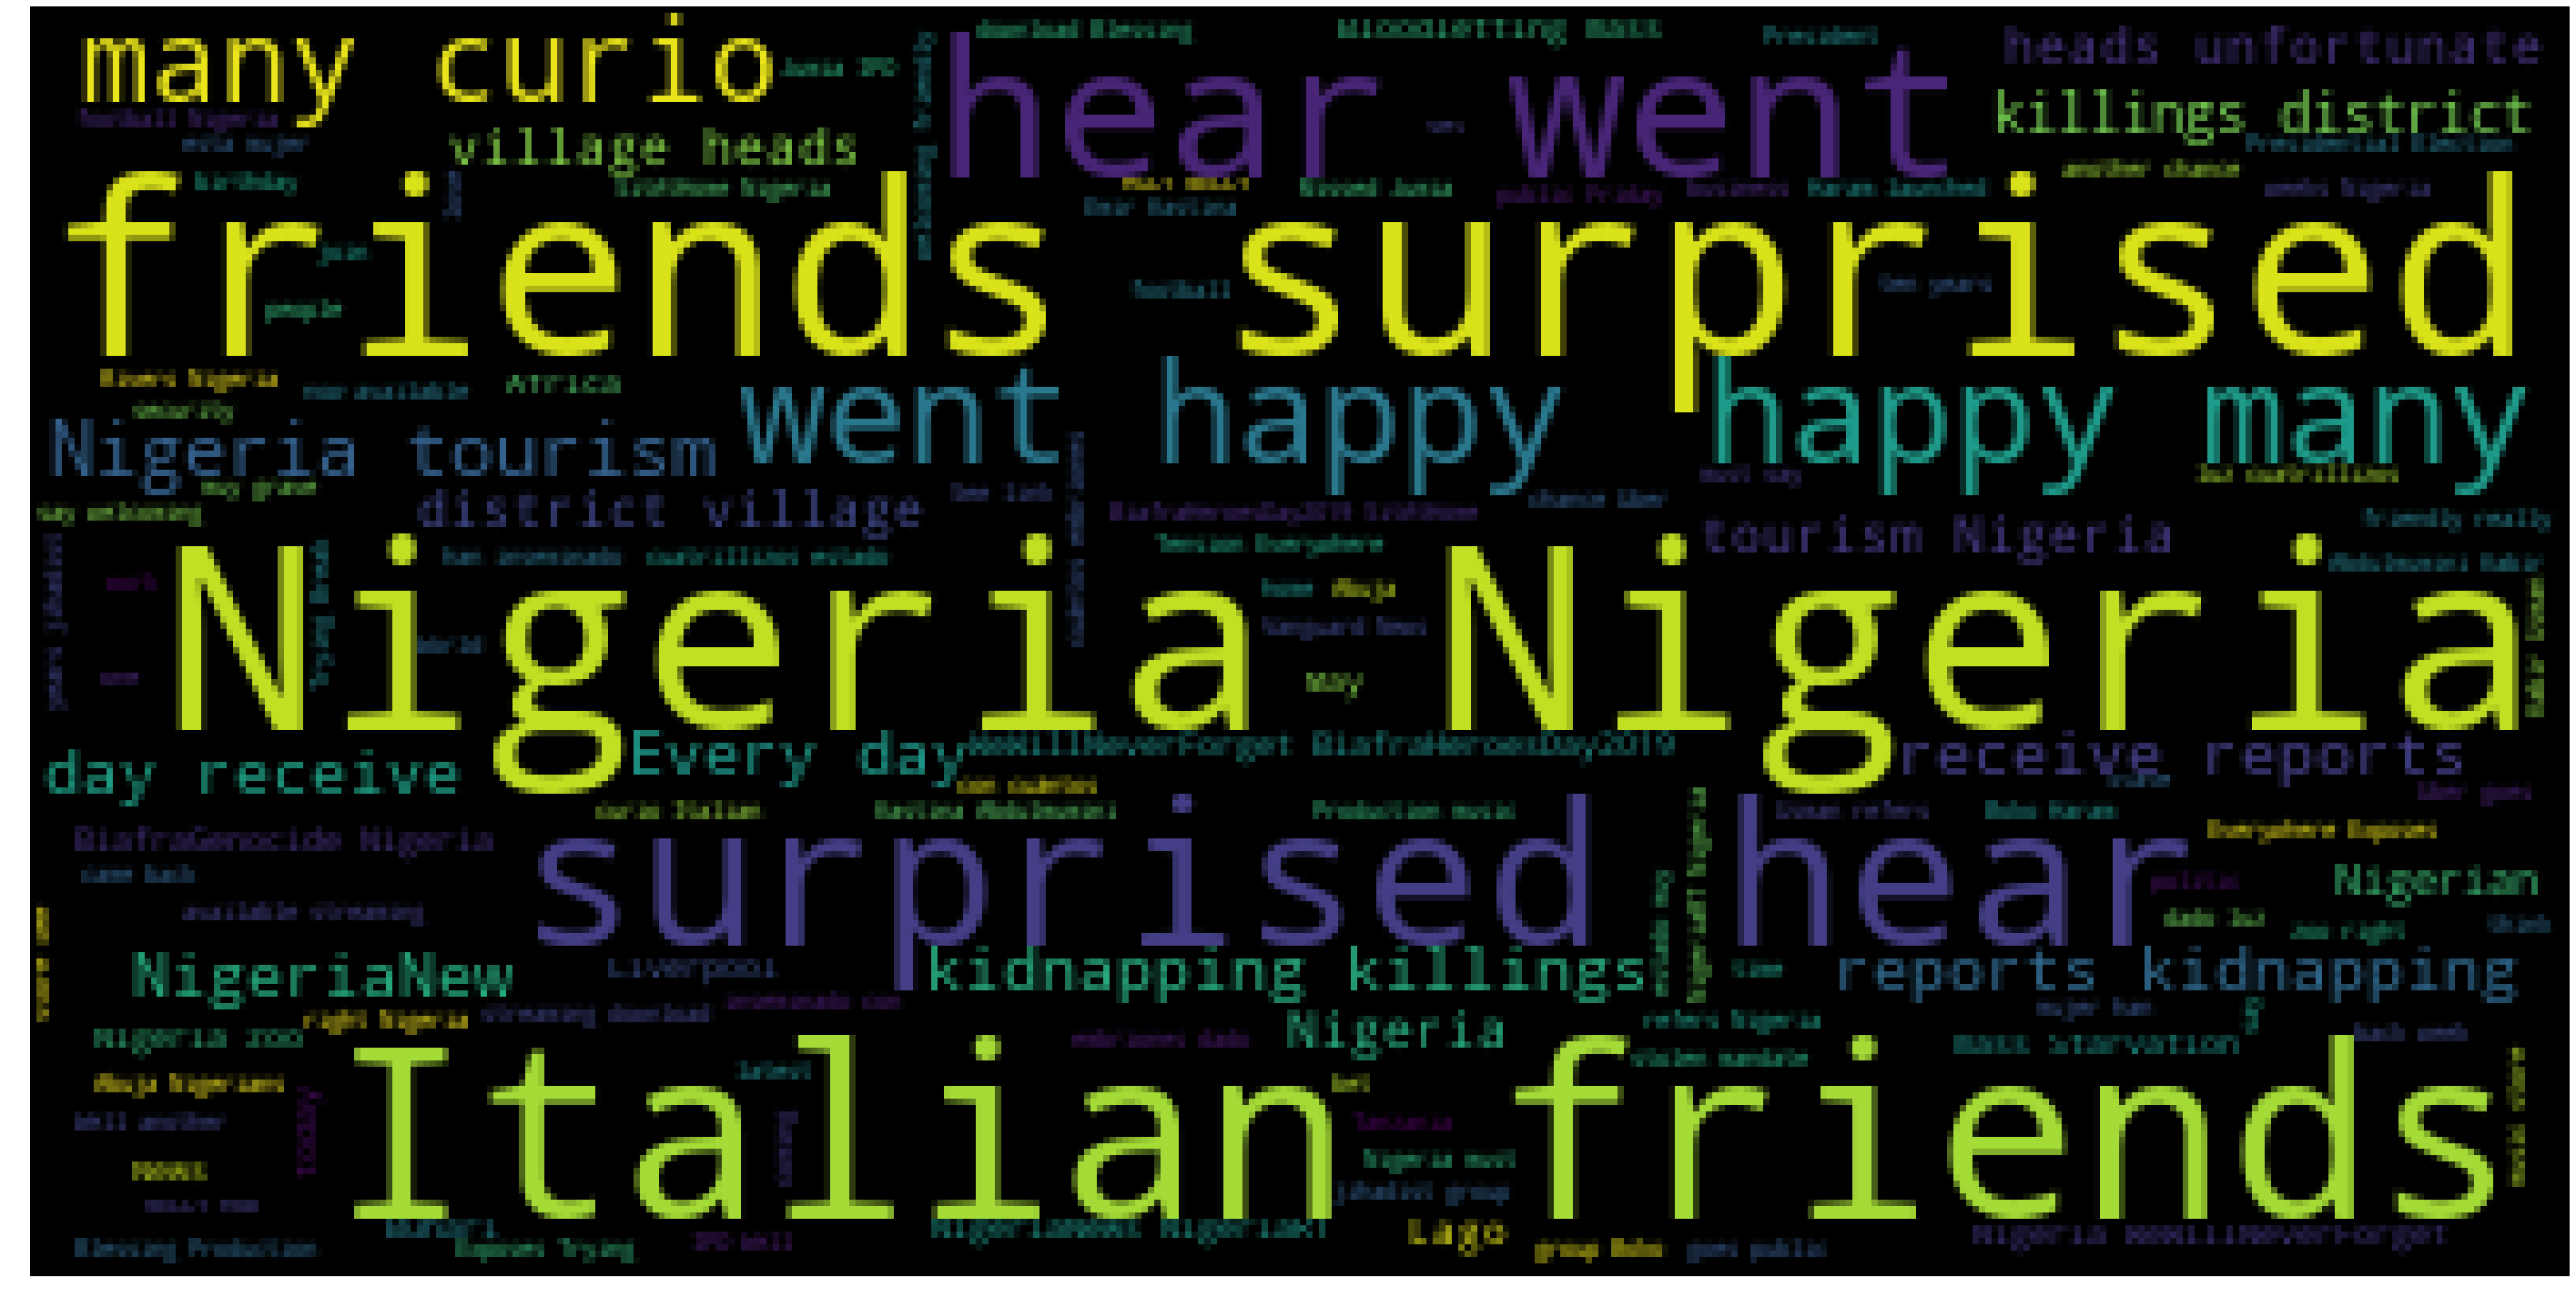

In [10]:
#------------------------------
import os
d = os.getcwd()
Rawfilename="TwitterResultsRaw.txt"

# Read the whole text.
text = open(path.join(d, Rawfilename)).read()
##print(text)
## --OR --
##with open("constitution.txt") as f:
##    lines f.readlines()                                                                            
##text = "".join(lines) 
##---------
wordcloud = WordCloud().generate(text)
# Open a plot of the generated image.
#figure(figsize = (20,2))
plt.figure(figsize=(50,40))
plt.imshow(wordcloud)
           #, aspect="auto")
plt.axis("off")
plt.show()
##trumpplt.show()
